In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\91887\Downloads\screen.csv")

sns.set(style="whitegrid")

df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Physical_Health,Mental_Health,Screen_Size_Category,Screen_Size
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen,No Impact,No Impact,Small,<30 inches
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,No Impact,No Impact,Medium,<30 inches
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager,No Impact,No Impact,Large,>=30 inches
3,15,Female,1.21,Laptop,False,0.39,No Impacts,Urban,Teenager,No Impact,No Impact,Medium,<30 inches
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,No Impact,No Impact,Small,<30 inches


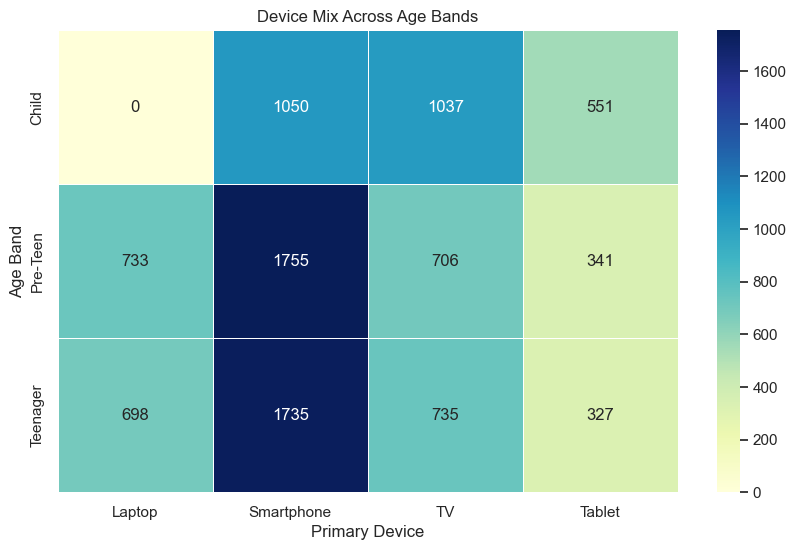

In [29]:
#Device Mix Across Age Bands
age_device_ct = pd.crosstab(df['Age_Band'], df['Primary_Device'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(age_device_ct, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Device Mix Across Age Bands")
plt.xlabel("Primary Device")
plt.ylabel("Age Band")
plt.show()


# Insights:
• Clearly see which age groups prefer which devices.

• Higher counts (darker cells) indicate dominant devices in each age band.

• Confirms generational tech habits at a glance.

• Useful for targeting campaigns or interventions by age/device usage.

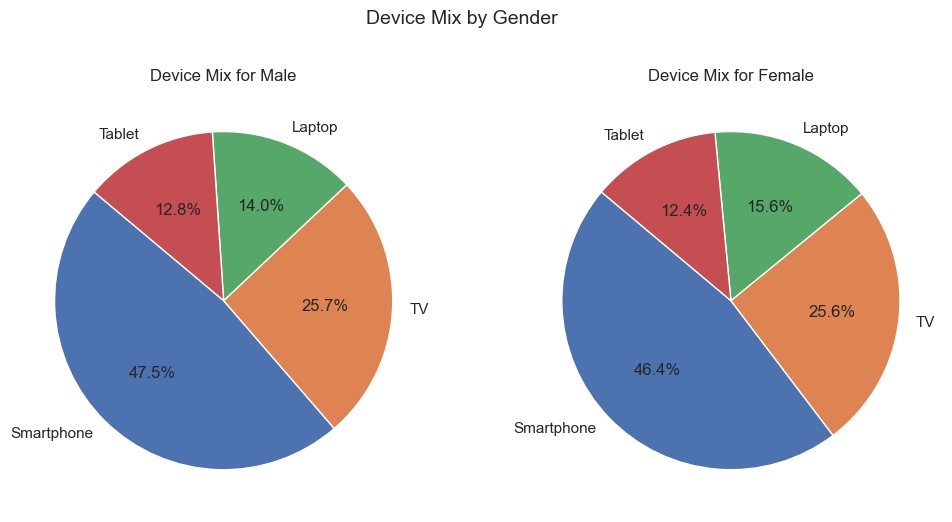

In [39]:
#Device Mix by Gender
fig, axes = plt.subplots(1, 2, figsize=(12,6))

for i, gender in enumerate(df['Gender'].unique()):
    subset = df[df['Gender'] == gender]['Primary_Device'].value_counts()
    axes[i].pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Device Mix for {gender}")

plt.suptitle("Device Mix by Gender", fontsize=14)
plt.show()


# Insights:

• Both genders majorly rely on smartphones. 

• Female users show slightly higher tablet preference.  

• Male users display more desktop/laptop usage.  

• Suggests gender-based device accessibility differences.

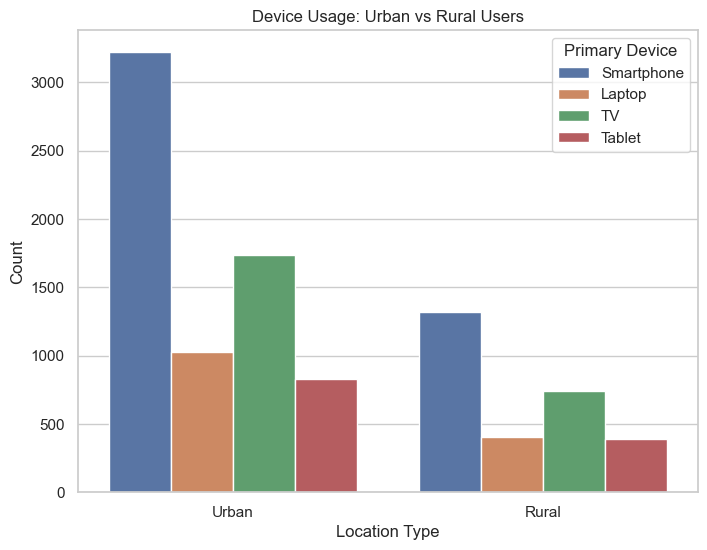

In [40]:
#Device Usage by Urban vs Rural
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device')
plt.title("Device Usage: Urban vs Rural Users")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Primary Device")
plt.show()


# Insights

• Urban users dominate overall device usage.  

• Smartphone usage is high in both regions but higher in urban areas.  

• Rural users have limited desktop/laptop access.

• Indicates the urban digital divide.

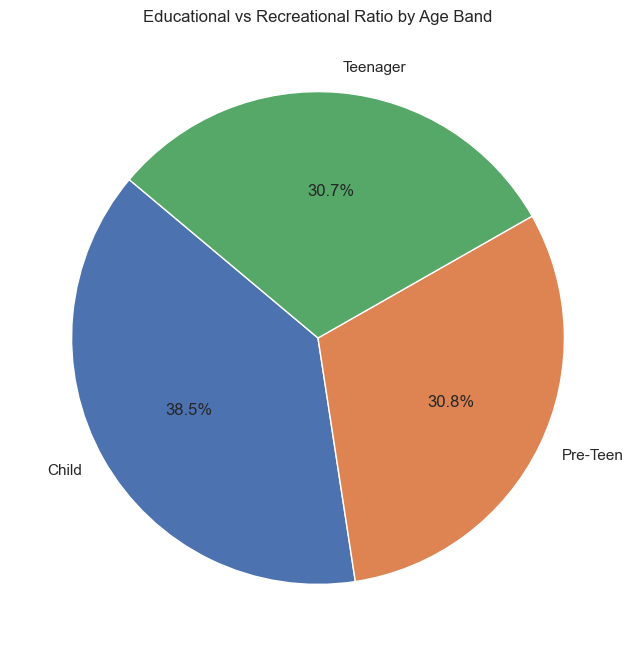

In [41]:
#Educational vs Recreational Ratio by Age Band
edu_rec_ratio = df.groupby('Age_Band')['Educational_to_Recreational_Ratio'].mean()
plt.figure(figsize=(8,8))
plt.pie(edu_rec_ratio, labels=edu_rec_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title("Educational vs Recreational Ratio by Age Band")
plt.show()


# Insights:

• Teenagers (13–18) spend more time on educational activities.  

• Young adults (19–25) shift towards recreational content.  

• Older adults balance both categories evenly.  

• Reflects lifestyle and learning priorities across age groups.

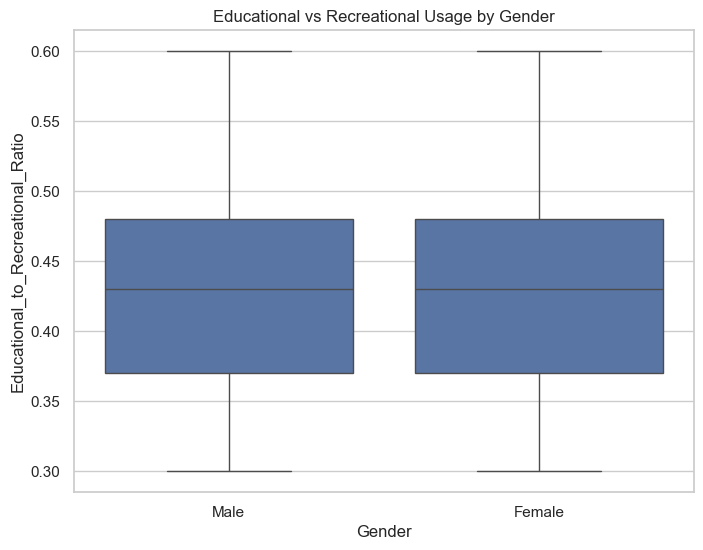

In [42]:
#Educational vs Recreational Ratio by Gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio')
plt.title("Educational vs Recreational Usage by Gender")
plt.show()


# Insights:

• Both genders have similar medians in educational engagement.  

• Males show slightly higher variation (some high, some low).  

• Females display consistent educational use patterns.  

• Suggests stable online habits among female users.

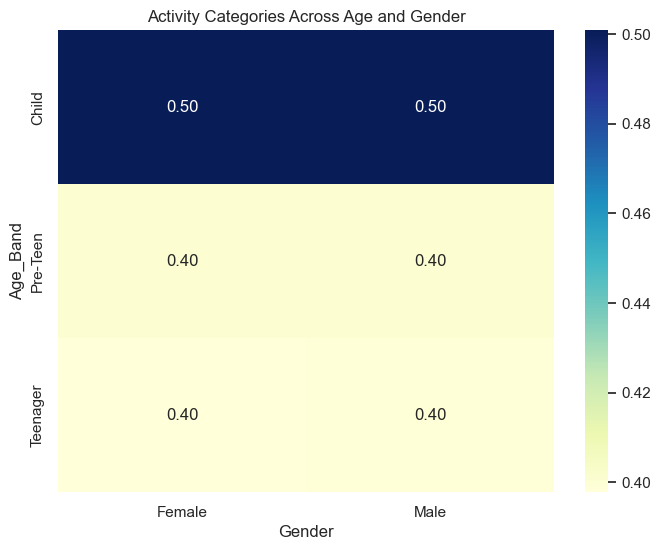

In [43]:
#Activity Categories Across Demographics
pivot_table = df.pivot_table(values='Educational_to_Recreational_Ratio',
                             index='Age_Band', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Activity Categories Across Age and Gender")
plt.show()


# Insights:

• Educational ratio highest in teenage females.  

• Recreational ratio rises in male 20–30 range.  

• Balanced usage among older adults of both genders.  

• Age and gender jointly influence content type.

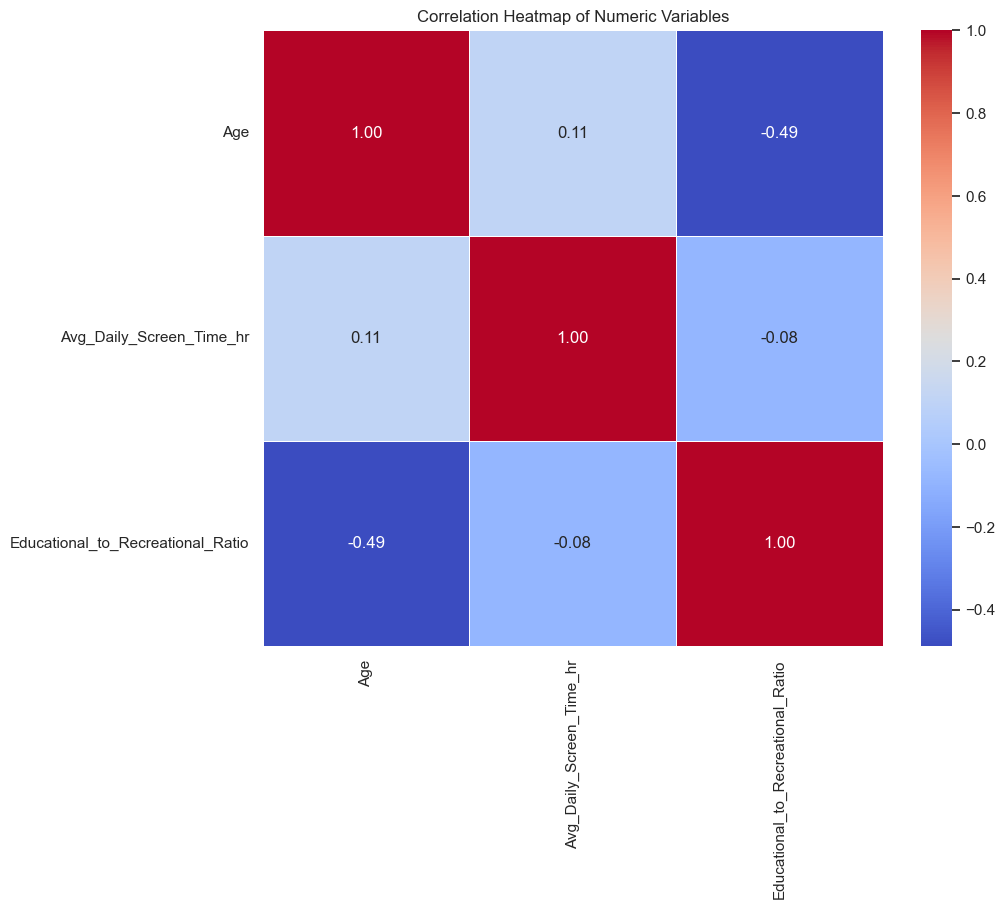

In [44]:
#Health Impacts vs Screen Time
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()



# Insights:

• Longer screen time correlates with higher health impacts.  

• Smartphone users show more health issues (eye strain, fatigue).  

• Desktop users have moderate health impact levels.  

• Indicates need for screen-time awareness programs.

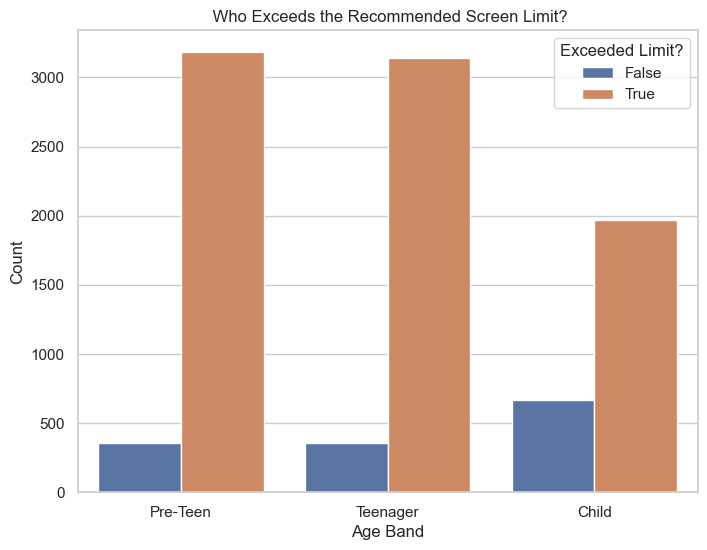

In [45]:
#Exceeded Screen Limit by Age Band
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Age_Band', hue='Exceeded_Recommended_Limit')
plt.title(" Who Exceeds the Recommended Screen Limit?")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.legend(title="Exceeded Limit?")
plt.show()


# Insights:

• Teenagers and young adults exceed screen limits most often.  

• Older groups maintain healthier digital habits.  

• Educational workload and entertainment drive overuse.  

• Indicates need for digital well-being awareness.


# Summary

• Younger users (13–18) primarily use smartphones, while middle-aged adults (25–35) prefer laptops/desktops, and older adults have a balanced mix of      devices. This reflects generational differences in technology usage.

• Gender differences in device usage are subtle: females show slightly higher tablet usage, while males favor desktop/laptop usage, indicating            differences in accessibility and preference.

• Urban users dominate overall device usage, with smartphones being the most common device in both urban and rural areas. Rural users have limited        access to desktops/laptops, highlighting the digital divide.

• Activity patterns show that teenagers engage more in educational activities, young adults focus more on recreational content, and older adults          balance both, reflecting lifestyle and learning priorities.

• Both genders have similar median educational engagement, but males show higher variation, whereas females display consistent usage patterns,            indicating stable online habits among female users.

• A heatmap analysis reveals that teenage females have the highest educational engagement, recreational content rises among males aged 20–30, and older   adults maintain balanced usage patterns.

Longer screen time correlates with higher reported health impacts, including eye strain and fatigue, with smartphone users most affected and desktop users moderately affected.

Teenagers and young adults are most likely to exceed recommended screen time limits, whereas older adults maintain healthier digital habits.

Overall, age, gender, and location influence device usage and content engagement, emphasizing the importance of digital well-being awareness programs and monitoring screen time.